Reference: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

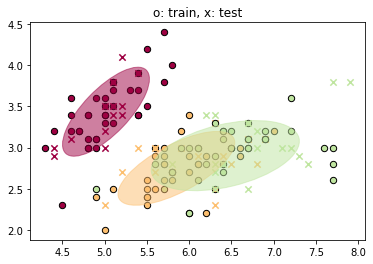

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture


def plot_gmm_covariances(gmm, X_train, y_train, X_test, y_test, indices):
    # gmm: trained GMM on X_train
    
    plt.figure()
    ax = plt.subplot(1, 1, 1)
    n_components = gmm.n_components
    
    for i in range(n_components):
        color = plt.cm.Spectral(i/n_components)
        evals, evecs = np.linalg.eigh(gmm.covariances_[i][indices][:,indices])
        u = evecs[0] / np.linalg.norm(evecs[0])
        angle = np.arctan2(u[1], u[0]) * 180 / np.pi
        evals = 2 * np.sqrt(2 * evals)

        ellipse = Ellipse(gmm.means_[i, indices], evals[0], evals[1], 180 + angle, color=color)
        ellipse.set_clip_box(ax.bbox)
        ellipse.set_alpha(0.5)
        ax.add_artist(ellipse)

        data = X_train[y_train == i]
        plt.scatter(data[:, indices[0]], data[:, indices[1]], marker='o', color=color, 
                    edgecolors='black', s=40)

        data = X_test[y_test == i]
        plt.scatter(data[:, indices[0]], data[:, indices[1]], marker='x', color=color,
                    edgecolors='black', s=40)
        
    plt.title('o: train, x: test')
    plt.show()

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1004)

n_components = len(set(y))

gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=20)
gmm.means_init = np.array([X_train[y_train == i].mean(0) for i in range(n_components)])
gmm.fit(X_train)

indices = [0, 1]
plot_gmm_covariances(gmm, X_train, y_train, X_test, y_test, indices)